# Employee Turnover Prediction Extended Exploration

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

## 1. Import and Clean Data

In [2]:
#Read in the data files
data = pd.read_csv("../data/general_data.csv",sep=",")

In [4]:
#Let's view some of the sample data
pd.set_option("display.max_columns", None)
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,No,51,Travel_Rarely,Sales,5,2,Life_Sciences,1,1,Female,1,Healthcare_Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,1,3,3.0,4.0,3.0
1,No,32,Travel_Frequently,Research_Development,14,4,Other,1,3,Male,4,Sales_Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,2,3.0,2.0,2.0
2,No,38,Non-Travel,Research_Development,2,5,Life_Sciences,1,4,Male,3,Human_Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,3,4,2.0,2.0,4.0
3,No,32,Travel_Rarely,Research_Development,8,1,Medical,1,5,Male,1,Sales_Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,1,3,4.0,4.0,3.0
4,No,46,Travel_Rarely,Research_Development,6,3,Life_Sciences,1,6,Female,4,Research_Director,Married,40710,3.0,Y,13,8,0,28.0,5,7,7,7,3,3,4.0,3.0,2.0


In [5]:
#Determine the shape of the data frame.
data.shape

(4410, 29)

In [8]:
#One hot encode for all missing values in columns: training
data['NumCompaniesWorked_Missing'] = np.where(data['NumCompaniesWorked'] >= 0, 1, 0)
data['TotalWorkngYears_Missing'] = np.where(data['TotalWorkingYears'] >= 0, 1, 0)
data['EnvironmentSatisfaction_Missing'] = np.where(data['EnvironmentSatisfaction'] >= 0, 1, 0)
data['JobSatisfaction_Missing'] = np.where(data['JobSatisfaction'] >= 0, 1, 0)
data['WorkLifeBalance_Missing'] = np.where(data['WorkLifeBalance'] >= 0, 1, 0)

In [11]:
#Replace the null values with the mean of each column
data=data.fillna(data.mean(numeric_only = True))

## 2. Explore

In [13]:
#Drop unnecessary columns
data.drop(['EmployeeCount','EmployeeID','StandardHours','Over18'],axis=1,inplace=True)

In [14]:
#Attrition is dependent var
from sklearn.preprocessing import LabelEncoder
label_encoder_y=LabelEncoder()
data['Attrition']=label_encoder_y.fit_transform(data['Attrition'])

In [16]:
#Make a list of variables for correlation

corr_cols = data[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance' ]]

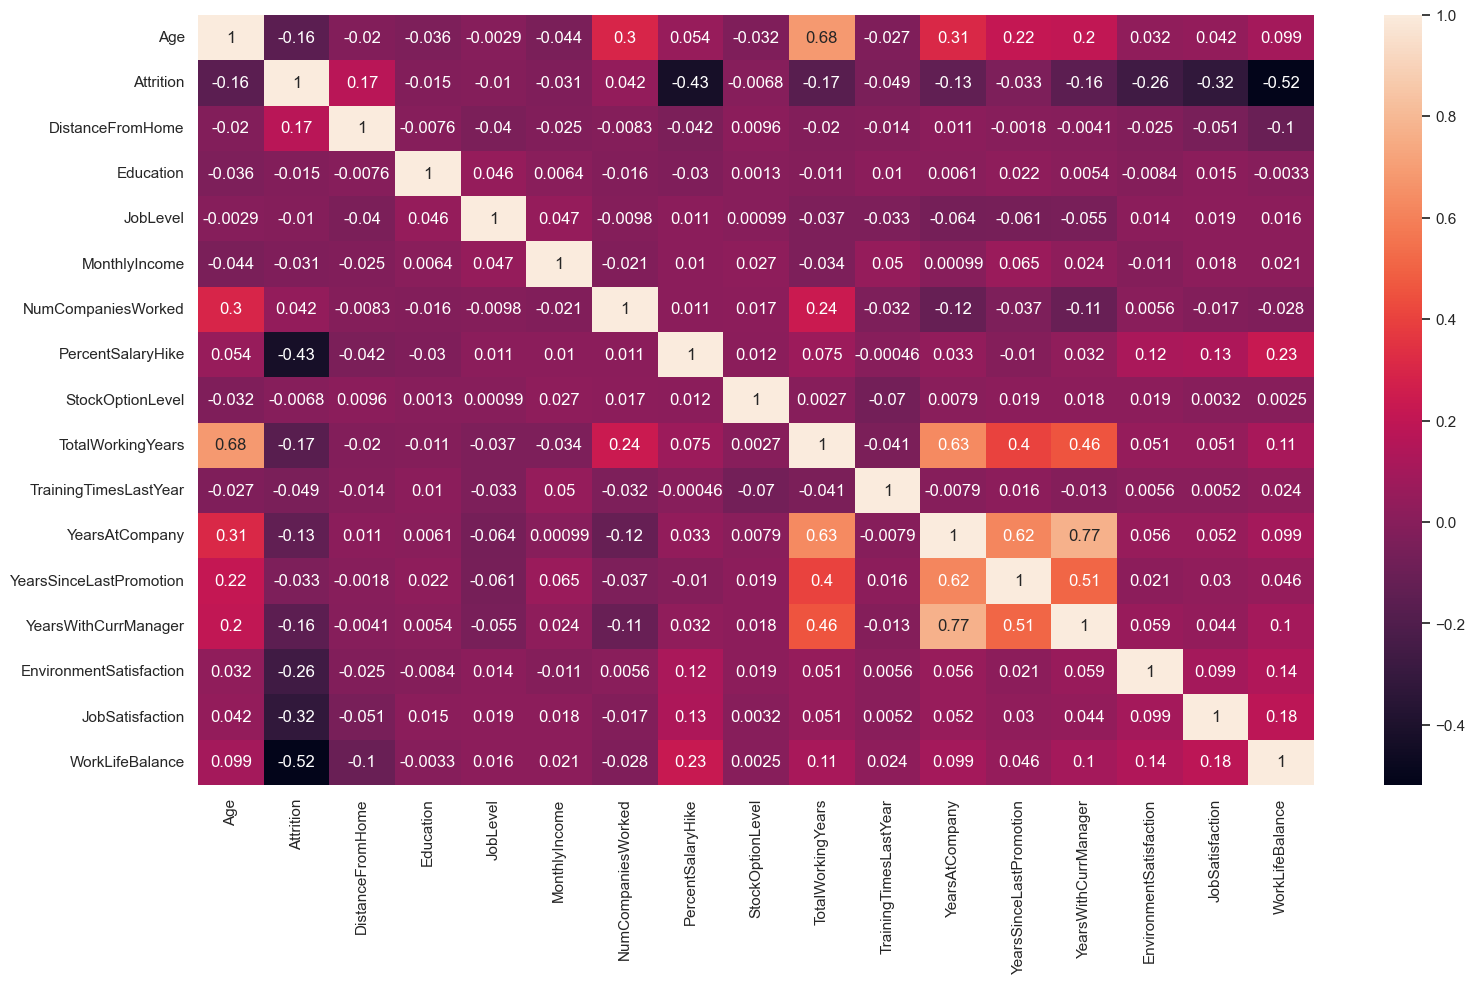

In [18]:
corr = corr_cols.corr(numeric_only = True)
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot = True)
plt.show()

In [102]:
# rel_with_attrition = corr['Attrition'] \
#     .sort_values() \
#     [['WorkLifeBalance', 'PercentSalaryHike','JobSatisfaction','EnvironmentSatisfaction', 'TrainingTimesLastYear', 'MonthlyIncome']] \
#     .abs().round(2).reset_index().rename(columns={'index': 'Variable', 'Attrition': 'Correlation'})




rel_with_attrition = corr['Attrition'] \
    .sort_values().round(2).reset_index().rename(columns={'index': 'Variable', 'Attrition': 'Correlation'})


rel_with_attrition

,Variable,Correlation
0,WorkLifeBalance,-0.52
1,PercentSalaryHike,-0.43
2,JobSatisfaction,-0.32
3,EnvironmentSatisfaction,-0.26
4,TotalWorkingYears,-0.17
5,Age,-0.16
6,YearsWithCurrManager,-0.16
7,YearsAtCompany,-0.13
8,TrainingTimesLastYear,-0.05
9,YearsSinceLastPromotion,-0.03


In [132]:
rel_with_attrition = rel_with_attrition.iloc[0:16].copy()

In [133]:
rel_with_attrition.Variable.values

array(['WorkLifeBalance', 'PercentSalaryHike', 'JobSatisfaction',
       'EnvironmentSatisfaction', 'TotalWorkingYears', 'Age',
       'YearsWithCurrManager', 'YearsAtCompany', 'TrainingTimesLastYear',
       'YearsSinceLastPromotion', 'MonthlyIncome', 'Education',
       'JobLevel', 'StockOptionLevel', 'NumCompaniesWorked',
       'DistanceFromHome'], dtype=object)

In [152]:
Initiative = {'Initiative Option': ['Yes', 'No', 'Yes',
       'Yes', 'No', 'No',
       'No', 'No', 'Yes',
       'No', 'Yes', 'No',
       'No', 'No', 'No',
       'No']}

rel_with_attrition['Initiative Option'] = pd.Series(Initiative['Initiative Option'])

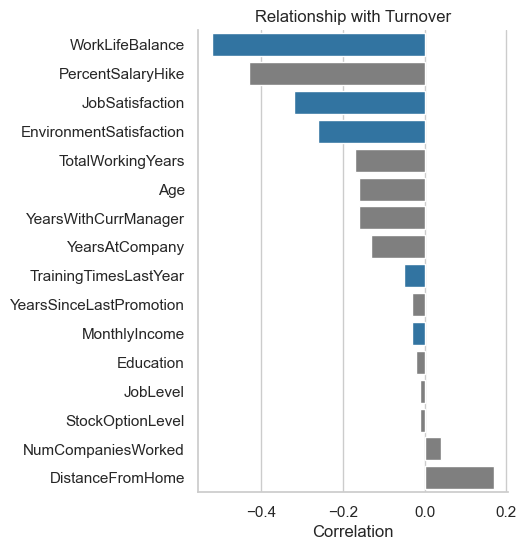

In [185]:
matplotlib.rcParams['font.family'] = 'Verdana'
sns.set(style = 'whitegrid')

plt.figure(figsize=(4, 6))  # Adjust the width and height as needed

sns.barplot(rel_with_attrition, y = 'Variable', x = 'Correlation', hue = 'Initiative Option', palette = ['tab:blue', 'tab:gray'], dodge = False)
plt.ylabel(None)
plt.title('Relationship with Turnover')

# Remove top and right spines
sns.despine(right=True, top=True)  # Set right and top to True to remove the corresponding spines
plt.legend().remove()


### EDA stats for worklife balance

In [189]:
# Counts
data['WorkLifeBalance'].value_counts()

WorkLifeBalance
3.00000    1751
4.00000    1527
2.00000     764
1.00000     346
3.01618      22
Name: count, dtype: int64

In [196]:
sum(data['WorkLifeBalance'] < 3)

1110

In [198]:
sum(data['WorkLifeBalance'] >= 3)

3300

In [200]:
sum(data['WorkLifeBalance'] < 2) / len(data['WorkLifeBalance'])

0.07845804988662132

In [201]:
0.07845804988662132 * len(data)

346.0

In [190]:
# Distribution
data['WorkLifeBalance'].describe()

count    4410.000000
mean        3.016180
std         0.912832
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: WorkLifeBalance, dtype: float64

In [193]:
# Coefficient of variation
(data['WorkLifeBalance'].std() / data['WorkLifeBalance'].mean()) * 100

30.26449308770764

Looking above, we can get a general sense of some of the relationships at play with our data. 

### **Highlight bars of key initiatves**.

Comparing the variabvels that have correlation values greater than 0.25 below:

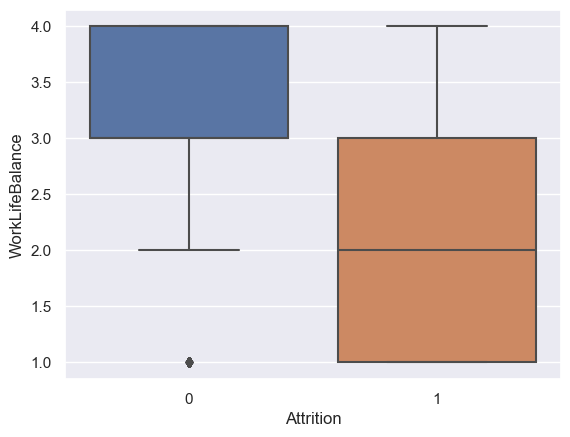

In [76]:
sns.boxplot(data=data, y ='WorkLifeBalance', x = 'Attrition')
plt.show()

In [89]:
data['JobRole'] = data['JobRole'].str.replace('_', ' ')


/opt/homebrew/Caskroom/miniforge/base/envs/acme/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


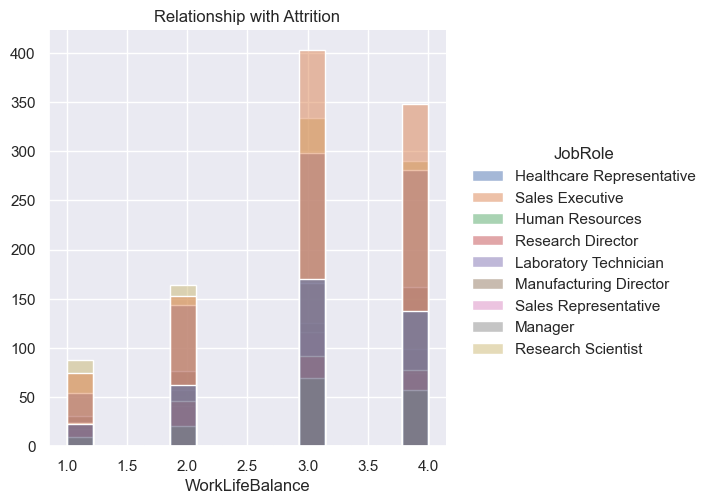

In [97]:
sns.displot(data=data, x ='WorkLifeBalance', hue= 'JobRole')
plt.ylabel(None)
plt.title('Relationship with Attrition')
plt.show()

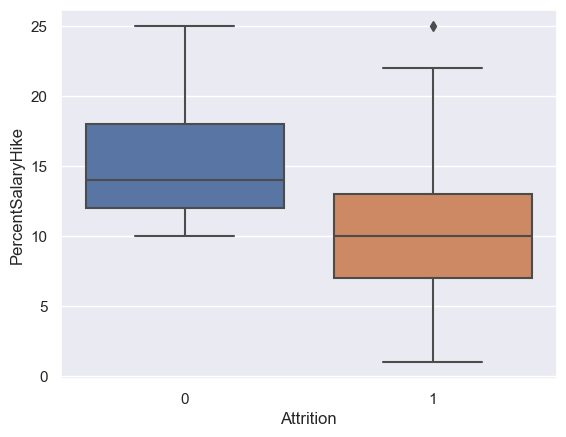

In [29]:
sns.boxplot(data=data, y ='PercentSalaryHike', x = 'Attrition')
plt.show()

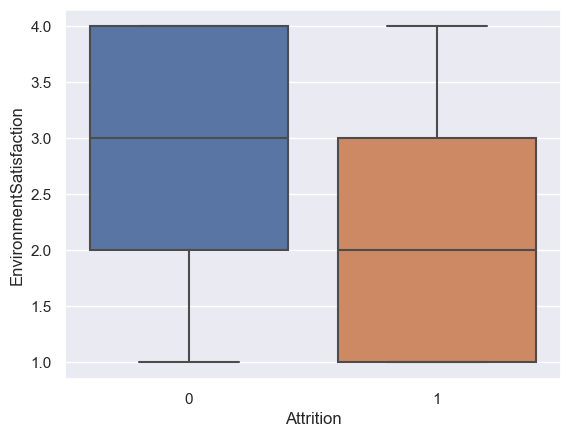

In [32]:
sns.boxplot(data=data, y ='EnvironmentSatisfaction', x = 'Attrition')
plt.show()

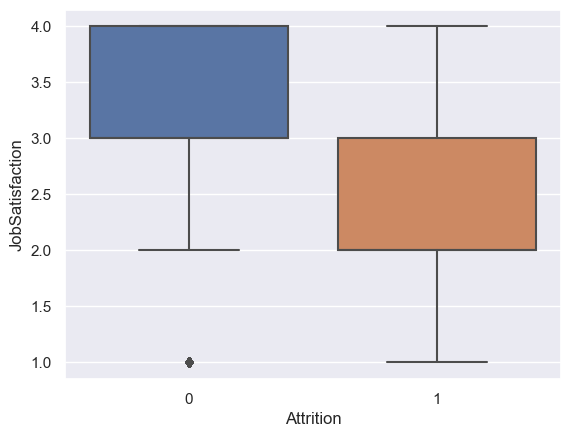

In [33]:
sns.boxplot(data=data, y ='JobSatisfaction', x = 'Attrition')
plt.show()

In [25]:
#Bin the age variable into buckets for easier EDA
data['Age_Bin']=pd.cut(x = data['Age'],
                        bins = [0,30,40,50,60],
                        labels = [0, 1, 2,3])

In [30]:
data.groupby('Attrition').mean().round(1)

/var/folders/_4/60jk4mm92bl_xrc0n8z2y4140000gn/T/ipykernel_37838/1965918915.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Attrition').mean().round(1)


,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked_Missing,TotalWorkngYears_Missing,EnvironmentSatisfaction_Missing,JobSatisfaction_Missing,WorkLifeBalance_Missing
Attrition,,,,,,,,,,,,,,,,,,,,,,,
0,37.6,7.4,2.9,2.1,65672.6,2.6,15.2,0.8,11.9,2.8,7.4,2.2,4.4,3.1,3.2,3.1,3.2,3.2,1.0,1.0,1.0,1.0,1.0
1,33.6,10.7,2.9,2.0,61682.6,2.9,10.3,0.8,8.3,2.7,5.1,1.9,2.9,2.2,2.3,2.3,2.4,1.9,1.0,1.0,1.0,1.0,1.0


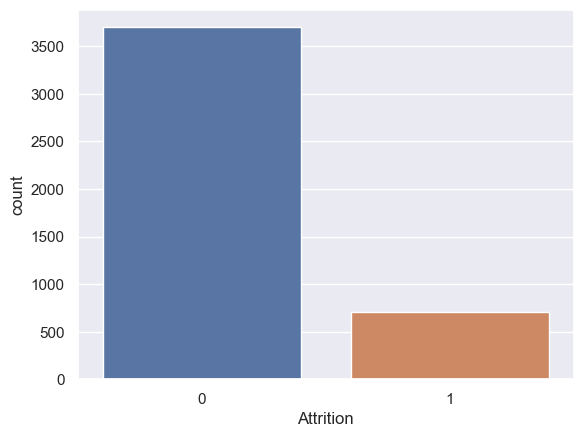

The percentage of employees leaving is 16%


In [36]:
sns.countplot(x = "Attrition",data=data)
plt.show()
print('The percentage of employees leaving is ' +  "{:.0%}".format(df['Attrition'].mean()))

In [179]:
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked_Missing,TotalWorkngYears_Missing,EnvironmentSatisfaction_Missing,JobSatisfaction_Missing,WorkLifeBalance_Missing,Age_Bin
0,0,51,Travel_Rarely,Sales,5,2,Life_Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,1,3,3.0,4.0,3.0,1,1,1,1,1,3
1,0,32,Travel_Frequently,Research_Development,14,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,3,2,3.0,2.0,2.0,1,1,1,1,1,1
2,0,38,Non-Travel,Research_Development,2,5,Life_Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,3,4,2.0,2.0,4.0,1,1,1,1,1,1
3,0,32,Travel_Rarely,Research_Development,8,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,1,3,4.0,4.0,3.0,1,1,1,1,1,1
4,0,46,Travel_Rarely,Research_Development,6,3,Life_Sciences,Female,4,Research Director,Married,40710,3.0,13,0,28.0,5,7,7,7,3,3,4.0,3.0,2.0,1,1,1,1,1,2


<Axes: xlabel='JobSatisfaction', ylabel='PercentSalaryHike'>

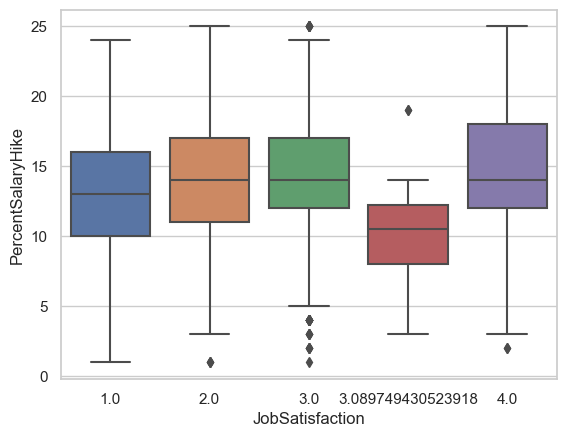

In [182]:
sns.boxplot(data = data, x = 'JobSatisfaction', y = 'PercentSalaryHike')